In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [37]:
df = pd.read_csv('train.csv')

In [33]:
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [38]:
df['budget'] = df['budget'] / 1000
    
df['revenue'] = df['revenue'] / 1000

In [39]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 611 to 860
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2100 non-null   int64  
 1   belongs_to_collection  425 non-null    object 
 2   budget                 2100 non-null   float64
 3   genres                 2095 non-null   object 
 4   homepage               673 non-null    object 
 5   imdb_id                2100 non-null   object 
 6   original_language      2100 non-null   object 
 7   original_title         2100 non-null   object 
 8   overview               2092 non-null   object 
 9   popularity             2100 non-null   float64
 10  poster_path            2099 non-null   object 
 11  production_companies   1978 non-null   object 
 12  production_countries   2059 non-null   object 
 13  release_date           2100 non-null   object 
 14  runtime                2098 non-null   float64
 15  spo

In [40]:
class regression():
    def __init__(self, degree):
        self.degree = degree
            
    def random_data(self, X=None, c=None, b=None, 
                         degree=3, num_points=300, 
                         X_lower=-10, X_higher=10, 
                         c_lower=-3, c_higher=3,
                         noise=True, noise_mu=0, 
                         noise_sigma=50, plot=False):

        def func(x, c): 
            return sum([c[i] * x**i for i in range(len(c))])

        if X == None: 
            self.X = np.random.uniform(X_lower, X_higher, num_points)
        if c == None: 
            self.c = [np.random.uniform(c_lower, c_higher) for _ in range(degree + 1)]

        self.y = np.array( [func(self.X[i], self.c) for i in range(num_points)] )

        if noise: 
            noise = np.random.normal(noise_mu, noise_sigma, num_points)
            self.y = [i + j for i, j in zip(self.y, noise)]

        if plot:
            plt.scatter(self.X, self.y, s = 5)
            plt.show()
        
        return self.X, self.y
            
    def split(self, X, y):
        x_tr, y_tr = np.array(X[:len(X)*3//4]), np.array(y[:len(y)*3//4])
        x_val, y_val = np.array(X[len(X)*3//4:]), np.array(y[len(y)*3//4:])
        
        return x_tr, y_tr, x_val, y_val

    def train(self, x, y):
        A = np.linalg.inv(np.array( 
            [ [sum(np.power(x, i)) for i in range(j, self.degree + 1 + j)] for j in range(self.degree + 1) ]
        ))

        self.W = np.dot(A, np.array( [ sum(y * np.power(x, i)) for i in range(self.degree+1) ] ))
    
    def predict(self, x):
        self.pred = sum([self.W[i] * x**i for i in range(len(self.W))])
        return self.pred
    
    def plot_data_vs_estimation(self, x, y, pred):
        plt.scatter(x, y, s = 3, label = 'True Value')
        plt.scatter(x, pred, s = 5, label = 'Prediction')
        plt.legend()
        plt.show()
        
    def RSE(self, y, g): 
        return sum(np.square(y - g)) / sum(np.square(y - 1 / len(y)*sum(y)))



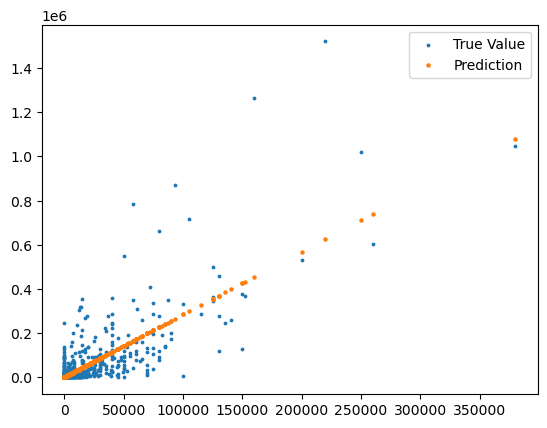

Error: 0.43


In [49]:
def main():
    r = regression(1)
    X = train_df['budget']
    y = train_df['revenue']
    x_tr, y_tr, x_val, y_val = r.split(X, y)
    r.train(x_tr, y_tr)
    preds = r.predict(x_val)
    r.plot_data_vs_estimation(x_val, y_val, preds)
    print('Error: {:.2f}'.format(r.RSE(y_val, preds)))

main()

<Axes: xlabel='miles_driven', ylabel='sales_price'>

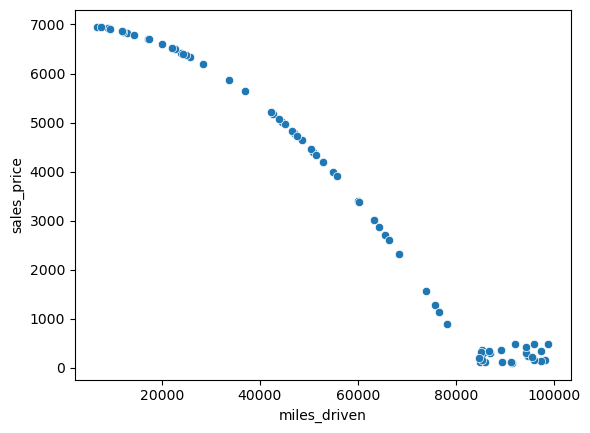

16